<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expectation-and-Variance" data-toc-modified-id="Expectation-and-Variance-1">Expectation and Variance</a></span><ul class="toc-item"><li><span><a href="#Random-Variables" data-toc-modified-id="Random-Variables-1.1">Random Variables</a></span><ul class="toc-item"><li><span><a href="#Probability-Mass-Functions" data-toc-modified-id="Probability-Mass-Functions-1.1.1">Probability Mass Functions</a></span></li></ul></li><li><span><a href="#Expectation" data-toc-modified-id="Expectation-1.2">Expectation</a></span><ul class="toc-item"><li><span><a href="#Linearity-of-Expectation" data-toc-modified-id="Linearity-of-Expectation-1.2.1">Linearity of Expectation</a></span></li></ul></li><li><span><a href="#Variance" data-toc-modified-id="Variance-1.3">Variance</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2">Summary</a></span></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

## Expectation and Variance

Almost all real-world phenomena contain some degree of randomness, making data generation and collection inherently random processes. Since we fit our models on these data, our models also contain randomness. To represent these random processes mathematically, we use random variables.

### Random Variables

A **random variable** is an algebraic variable that represents a numerical value determined by a probabilistic event. We typically use capital letters like $ X $ or $ Y $ to denote a random variable.

We must always specify what a given random variable represents. For example, we may write that the random variable $ X $ represents the number of heads in 10 coin flips. The definition of a random variable determines the values it can take on. In this example, $ X $ may only take on values between $ 0 $ and $ 10 $.

We must also be able to determine the probability that the the random variable takes on each value. For example, the probability that $ X = 0 $ is written as $ P(X = 0) = (0.5)^{10} $.

#### Probability Mass Functions

The **probability mass function (PMF)** or the **distribution** of a random variable $X$ yields the probability that $X$ takes on each of its possible values. If we let $\mathbb{X}$ be the set of values that $X$ can take on and $x$ be a particular value in $\mathbb{X}$, the PMF of $X$ must satisfy the following rules:

$$
1) \sum_{x \in \mathbb{X}} \mathbb{P}(X = x) = 1
$$

$$
2) \text{ For all } x \in \mathbb{X}, 0 \leq \mathbb{P}(X = x) \leq 1
$$

The first rule states that the probabilities for all possible values of $ X $ sum to $ 1 $.

The second rule states that each individual probability for a given value of $ X $ must be between $ 0 $ and $ 1 $.

Suppose we let $ X $ represent the result of one roll from a fair six-sided die. We know that $ X \in \{1, 2, 3, 4, 5, 6\} $ and that $ P(X = 1) = P(X = 2) = \ldots = P(X = 6) = \frac{1}{6} $. We can plot the PMF of $ X $ as a probability distribution:

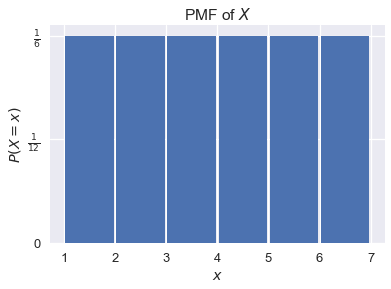

In [11]:
# HIDDEN
plt.hist(np.arange(1, 7), bins=np.arange(1, 7.1, 1), normed=True, rwidth=0.95)
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')
plt.yticks((0, 1/12, 1/6), ('0', r'$\frac{1}{12}$', r'$\frac{1}{6}$'))
plt.title('PMF of $X$');

### Expectation

We are often interested in the long-run average of a random variable because it gives us a sense of the center of the variable's distribution. We call this long-run average the **expected value**, or **expectation** of a random variable. The expected value of a random variable $ X $ is defined as:

$$\mathbb{E}[X] = \sum_{x\in \mathbb{X}} x \cdot \mathbb{P}(X = x)$$

For example, if $ X $ represents the roll of a single fair six-sided die, 

$$
\begin{aligned}
\mathbb{E}[X]
&= 1 \cdot \mathbb{P}(X = 1) + 2 \cdot \mathbb{P}(X = 2) + \ldots + 6 \cdot \mathbb{P}(X = 6) \\
&= 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + \ldots + 6 \cdot \frac{1}{6} \\
&= 3.5
\end{aligned}
$$

Notice that the expected value of $ X $ does not have to be a possible value of $ X $; although in this case  $ \mathbb{E}[X] = 3.5 $, $ X $ never takes on the value $ 3.5 $.

**Example:** Suppose we have a small dataset of four people:

In [13]:
# HIDDEN
data={"Name":["Carol","Bob","John","Dave"], 'Age': [50,52,51,50]}
people = pd.DataFrame(data)
people

,Age,Name
0,50,Carol
1,52,Bob
2,51,John
3,50,Dave


We pick one person from this dataset uniformly at random. Let $ Y $ be a random variable representing the age of this person. Then:

$$
\begin{aligned}
\mathbb{E}[Y]
&= 50 \cdot \mathbb{P}(Y = 50) + 51 \cdot \mathbb{P}(Y = 51) + 52 \cdot \mathbb{P}(Y = 52) \\
&= 50 \cdot \frac{2}{4} + 51 \cdot \frac{1}{4} + 52 \cdot \frac{1}{4} \\
&= 50.75
\end{aligned}
$$

**Example:** Suppose we sample two people from this dataset with replacement. If the random variable $ Z $ represents the difference between the ages of the first and second persons in the sample, what is  $ \mathbb{E}[Z] $?

To approach this problem, we define two new random variables. We define $ X $ as the age of the first person and $ Y $ as the age of the second. Then, $ Z = X - Y $. Then, we find the joint probability distribution of $ X $ and $ Y $: the probability of each value that $ X $ and $ Y $ can take on simultaneously. For example, the probability that $ X = 51 $ and $ Y = 50 $ is $ P(X = 51, Y = 50) = \frac{1}{4} \cdot \frac{2}{4} = \frac{2}{16} $. In a similar way, we get:

<table>
  <tr>
    <th></th>
    <th>$Y=50$</th>
    <th>$Y=51$</th>
    <th>$Y=52$</th>
  </tr>
  <tr>
    <td>$X=50$</td>
    <td>4/16</td>
    <td>2/16</td>
    <td>2/16</td>
  </tr>
  <tr>
    <td>$X=51$</td>
    <td>2/16</td>
    <td>1/16</td>
    <td>1/16</td>
  </tr>
  <tr>
    <td>$X=52$</td>
    <td>2/16</td>
    <td>1/16</td>
    <td>1/16</td>
  </tr>
</table>

The above table lets us also find the PMF for $ Z $. For example, $ P(Z = 1) = P(X = 51, Y = 50) + P(X = 52, Y = 51) = \frac{3}{16} $. Thus,

$$
\begin{aligned}
\mathbb{E}[Z]
&= (-2) \cdot P(Z = -2) + (-1) \cdot P(Z = -1) + \ldots + (2) \cdot P(Z = 2) \\
&= (-2) \cdot \frac{2}{16} + (-1) \cdot \frac{3}{16}+ \ldots + (2) \cdot \frac{2}{16} \\
&= 0
\end{aligned}
$$

Since $ \mathbb{E}[Z] = 0 $, we expect that in the long run the difference between the ages of the people in a sample of size 2 will be 0.

#### Linearity of Expectation

When working with linear combinations of random variables as we did above, we can often make good use of the **linearity of expectation** instead of tediously calculating each joint probability individually.

The linearity of expectation states that:

$$
\begin{aligned}
\mathbb{E}[X + Y] &= \mathbb{E}[X] + \mathbb{E}[Y] \\
\end{aligned}
$$

From this statement we may also derive:

$$
\begin{aligned}
\mathbb{E}[cX] &= c\mathbb{E}[X] \\
\end{aligned}
$$

where $X$ and $Y$ are random variables, and $c$ is a constant.

In words, the expectation of a sum of any two random variables is equal to the sum of the expectations of the variables.

In the previous example, we saw that $ Z = X - Y $. Thus,  $ \mathbb{E}[Z] = \mathbb{E}[X - Y] = \mathbb{E}[X] - \mathbb{E}[Y] $. 

Now we can calculate $ \mathbb{E}[X] $ and  $ \mathbb{E}[Y] $ separately from each other. Since $ \mathbb{E}[X] = \mathbb{E}[Y] = 50.75 $, $ \mathbb{E}[Z] = 50.75 - 50.75 = 0 $.

The linearity of expectation holds even if $ X $ and $ Y $ are dependent on each other! To highlight an example of this, let us now consider the case in which we sample two people from the same dataset as above but without replacement. As before, we define $X$ as the age of the first person and $Y$ as the age of the second, and $Z = X - Y$. Now $X$ and $Y$ are not independent; for example, if we know $X = 51$, then $Y \neq 51$. We find the joint distribution of $X$ and $Y$ as follows:

<table>
  <tr>
    <th></th>
    <th>$Y=50$</th>
    <th>$Y=51$</th>
    <th>$Y=52$</th>
  </tr>
  <tr>
    <td>$X=50$</td>
    <td>2/12</td>
    <td>2/12</td>
    <td>2/12</td>
  </tr>
  <tr>
    <td>$X=51$</td>
    <td>2/12</td>
    <td>0</td>
    <td>1/12</td>
  </tr>
  <tr>
    <td>$X=52$</td>
    <td>2/12</td>
    <td>1/12</td>
    <td>0</td>
  </tr>
</table>

With this, we can find $\mathbb{E}[Z]$ as before:

$$
\begin{aligned}
\mathbb{E}[Z]
&= (-2) \cdot P(Z = -2) + (-1) \cdot P(Z = -1) + \ldots + (2) \cdot P(Z = 2) \\
&= (-2) \cdot \frac{2}{12} + (-1) \cdot \frac{3}{12}+ \ldots + (2) \cdot \frac{2}{12} \\
&= 0
\end{aligned}
$$

We can also find the PMF of $Y$ with the table:

$$
P(Y = 50) = P(Y = 50, X = 50) + P(Y = 50, X = 51) + P(Y = 50, X = 52) = \frac{2}{12} + \frac{2}{12} + \frac{2}{12} = \frac{1}{2} \\
P(Y = 51) = \frac{2}{12} + 0 + \frac{1}{12} = \frac{1}{4} \\
P(Y = 52) = \frac{2}{12} + \frac{1}{12} + 0 = \frac{1}{4}
$$

Thus, we have shown that $Y$ has the same PMF as $X$, which means that they have the same expectation as well. Since the linearity of expectation holds for dependent random variables, we could have simply used this fact to conclude that $\mathbb{E}[Z] = \mathbb{E}[X - Y] = \mathbb{E}[X] - \mathbb{E}[Y] = 50.75 - 50.75 = 0$.

Note that the linearity of expectation only holds for linear combinations of random variables. For example, $ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] $ is not a linear combination of $ X $ and $ Y $. In this case, $ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] $ is true in general only for independent random variables.

### Variance

The variance of a random variable is a numerical description of the spread of a random variable. For a random variable $ X $:

$$
\begin{aligned}
Var(X) &= \mathbb{E}[(X - \mathbb{E}[X])^2] \\
\end{aligned}
$$

The above formula states that the variance of $ X $ is the average squared distance from $ X $'s expected value.

With some algebraic manipulation that we omit for brevity, we may also equivalently write:

$$
\begin{aligned}
Var(X) &= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
\end{aligned}
$$

Consider the following two random variables $ X $ and $ Y $ with the following probability distributions:

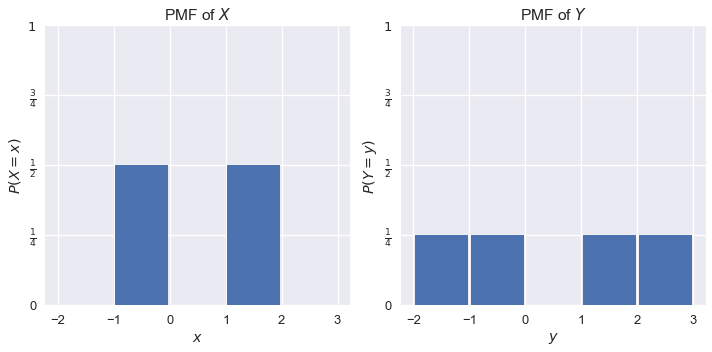

In [55]:
# HIDDEN
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist([-1, 1], bins=np.arange(-2, 4), normed=True, rwidth=0.95)
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')
plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(0, 1.1, 0.25),
           (0, r'$\frac{1}{4}$', r'$\frac{1}{2}$', r'$\frac{3}{4}$', r'$1$'))
plt.ylim(0, 1)
plt.title('PMF of $X$')

plt.subplot(1, 2, 2)
plt.hist([-2, -1, 1, 2], bins=np.arange(-2, 4), normed=True, rwidth=0.95)
plt.xlabel('$y$')
plt.xticks(np.arange(-2, 4))
plt.ylabel('$P(Y = y)$')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.25),
           (0, r'$\frac{1}{4}$', r'$\frac{1}{2}$', r'$\frac{3}{4}$', r'$1$'))
plt.title('PMF of $Y$')
plt.tight_layout();

$ X $ takes on values -1 and 1 with probability $ \frac{1}{2} $ each. $ Y $ takes on values -2, -1, 1, and 2 with probability $ \frac{1}{4} $ each. We find that $ \mathbb{E}[X] = \mathbb{E}[Y] = 0 $. Since $ Y $'s distribution has a higher spread than $ X $'s, we expect that $ Var(Y) $ is larger than $ Var(X) $.

$$
\begin{aligned}
Var(X)
&= \mathbb{E}[X^2] - \mathbb{E}[X]^2 \\
&= \mathbb{E}[X^2] - 0^2 \\
&= \mathbb{E}[X^2] \\
&= (-1)^2 P(X = -1) + (1)^2 P(X = 1) \\
&= 1 \cdot 0.5 + 1 \cdot 0.5 \\
&= 1 \\\\
Var(Y)
&= \mathbb{E}[Y^2] - \mathbb{E}[Y]^2 \\
&= \mathbb{E}[Y^2] - 0^2 \\
&= \mathbb{E}[Y^2] \\
&= (-2)^2 P(Y = -2) + (-1)^2 P(Y = -1) + (1)^2 P(Y = 1) + (2)^2 P(Y = 2) \\
&= 4 \cdot 0.25 + 1 \cdot 0.25 + 1 \cdot 0.25 + 4 \cdot 0.25\\
&= 2.5
\end{aligned}
$$

As expected, the variance of $ Y $ is greater than the variance of $ X $.

The variance has a useful property to simplify some calculations. If $ X $ is a random variable:

$$
\begin{aligned}
Var(aX + b) &= a^2 Var(X)
\end{aligned}
$$

If two random variables $ X $ and $ Y $ are independent:

$$
\begin{aligned}
Var(X + Y) = Var(X) + Var(Y)
\end{aligned}
$$

Note that the linearity of expectation holds for any $ X $ and $ Y $ even if they are dependent; $ Var(X + Y) = Var(X) + Var(Y) $ holds only when $ X $ and $ Y $ are independent.

### Generalization

Suppose we want to use a random variable $X$ to a simulate a biased coin with $P(Heads) = p$. We can say that $X = 1$ if the coin flip is heads, and $X = 0$ if the coin flip is tails. Therefore, $P(X = 1) = p$, and $P(X = 0) = 1 - p$. This type of binary random variable is called a Bernoulli random variable; we can calculate its expected value and variance as follows:

$$\mathbb{E}[X] = 1 \times p + 0 \times (1 - p) = p$$

$$Var(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = 1^2 \times p + 0^2 \times (1 - p) - p^2 = p - p^2 = p(1 - p)$$

#### Sample Means

Suppose we flip a coin with some unknown bias $p$ a total of $n$ times and find the proportion of heads that we get. Let us call this proportion $\hat{p}$. If we wanted to estimate $P(Heads)$, we might intuitively believe that $\hat{p}$ is a good guess. Now, we can use our newly gained knowledge of random variables, expectation, and variance to confirm this intuition.

Note that $\hat{p}$ itself is a random variable; thus, it must have some underlying distribution that we can find. If we let $X_i$ be a Bernoulli random variable for the $i^{th}$ coin flip (note that the $X_i$'s are independent since they represent independent coin flips), then we can mathematically determine that $\hat{p} = \frac{1}{n} \sum_{i=1}^{n} X_i$. We can then calculate the expected value, variance, and standard deviation of $\hat{p}$ as follows:

$$\mathbb{E}[\frac{1}{n} \sum_{i=1}^{n} X_i] = \frac{1}{n} \sum_{i=1}^{n}\mathbb{E}[X_i] = \frac{1}{n} \times np = p$$

$$Var(\frac{1}{n} \sum_{i=1}^{n} X_i) = \frac{1}{n^2} \sum_{i=1}^{n}Var(X_i) = \frac{1}{n^2} \times np(1-p) = \frac{p(1-p)}{n}$$

The expected value of $\hat{p}$, the sample proportion, is the same as $p$, the true proportion! This is why we sometimes call the sample proportion an *unbiased estimator* of the true proportion, although we will leave the formal definiton of bias for the last section of this chapter.

Furthermore, the variance of the sample proportion gives us a measure of how much error we should expect if we use $\hat{p}$ to estimate $p$. As we increase the number of samples $n$, the error of our estimator decreases, and $\hat{p}$ converges to $p$. This fact is known as the law of large numbers.

## Summary

In this section, we learn that random variables are variables with multiple possible outcomes. These outcomes must be defined completely and precisely—each outcome must have a well-defined probability of occurrence. Expectation and variance are simple descriptions of a random variable's center and spread. We use the versatility of random variables to describe data generation and modeling.